In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno

%matplotlib inline

#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 200)

In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.set_index('row_id', inplace=True)

In [7]:
data.shape

(1000000, 80)

In [9]:
data

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,,,,,,,
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.823740,0.285673,0.343307,-0.436747,1.700549,-1.069432,0.819698,-0.168457,-0.429074,0.844075,...,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733
999996,-0.769106,-0.387363,-1.227469,0.601183,0.351161,0.219475,-0.530277,0.853452,0.608646,1.648023,...,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807
999997,0.147534,-0.715276,-0.465049,-1.988941,-1.594535,-1.044882,3.159455,-0.634108,0.890382,-1.212444,...,2.891854,3.105002,-3.470520,NaN,0.096988,0.569255,3.609790,-0.584108,-1.492096,-0.997502


<AxesSubplot:>

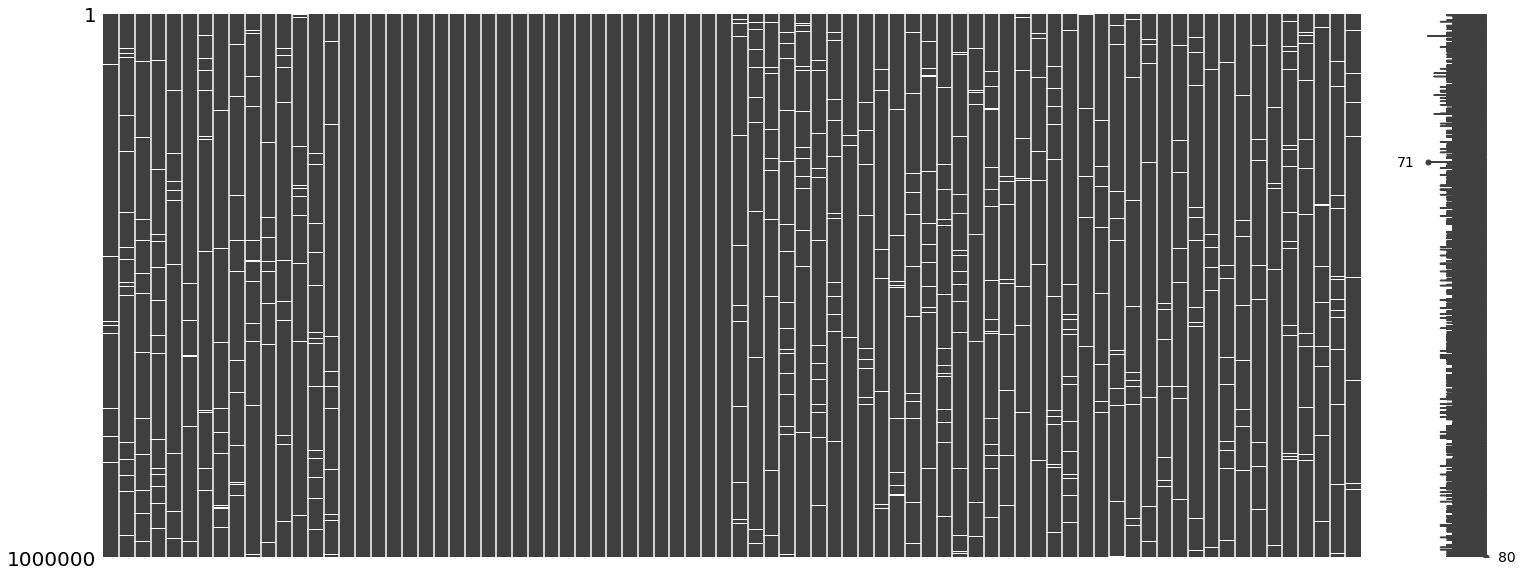

In [10]:
msno.matrix(data)

In [50]:
print(f"Le dataset comporte {data.isna().sum().sum() / data.size * 100} % de Nans")

Le dataset comporte 1.25 % de Nans


In [27]:
data.dtypes.value_counts()

float64    55
int64      25
dtype: int64

In [31]:
#sélection de toutes les colonnes 

mask_int64 = data.dtypes == 'int64'

In [49]:
#liste des colonnes int64
data.loc[:, data.columns[mask_int64]].columns

Index(['F_2_0', 'F_2_1', 'F_2_2', 'F_2_3', 'F_2_4', 'F_2_5', 'F_2_6', 'F_2_7',
       'F_2_8', 'F_2_9', 'F_2_10', 'F_2_11', 'F_2_12', 'F_2_13', 'F_2_14',
       'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20', 'F_2_21',
       'F_2_22', 'F_2_23', 'F_2_24'],
      dtype='object')

In [85]:
def split_cols(col):
    splitted = col.split('_')
    return splitted[1], splitted[2]

F_2_xx : int64
F_x_yy (x!=2) : float 64

In [92]:
#vérification du nombre de nans dans les colonnes commençant par F_2

print(f"Les colonnes commençant par F_2 possèdent au total {data.rename(columns=lambda x: split_cols(x)[0]).loc[:,'2'].isna().sum().sum()} Nans")

Les colonnes commençant par F_2 possèdent au total 0 Nans


In [102]:
pearsoncorr = data.loc[:, data.columns[~mask_int64]].corr()

<AxesSubplot:>

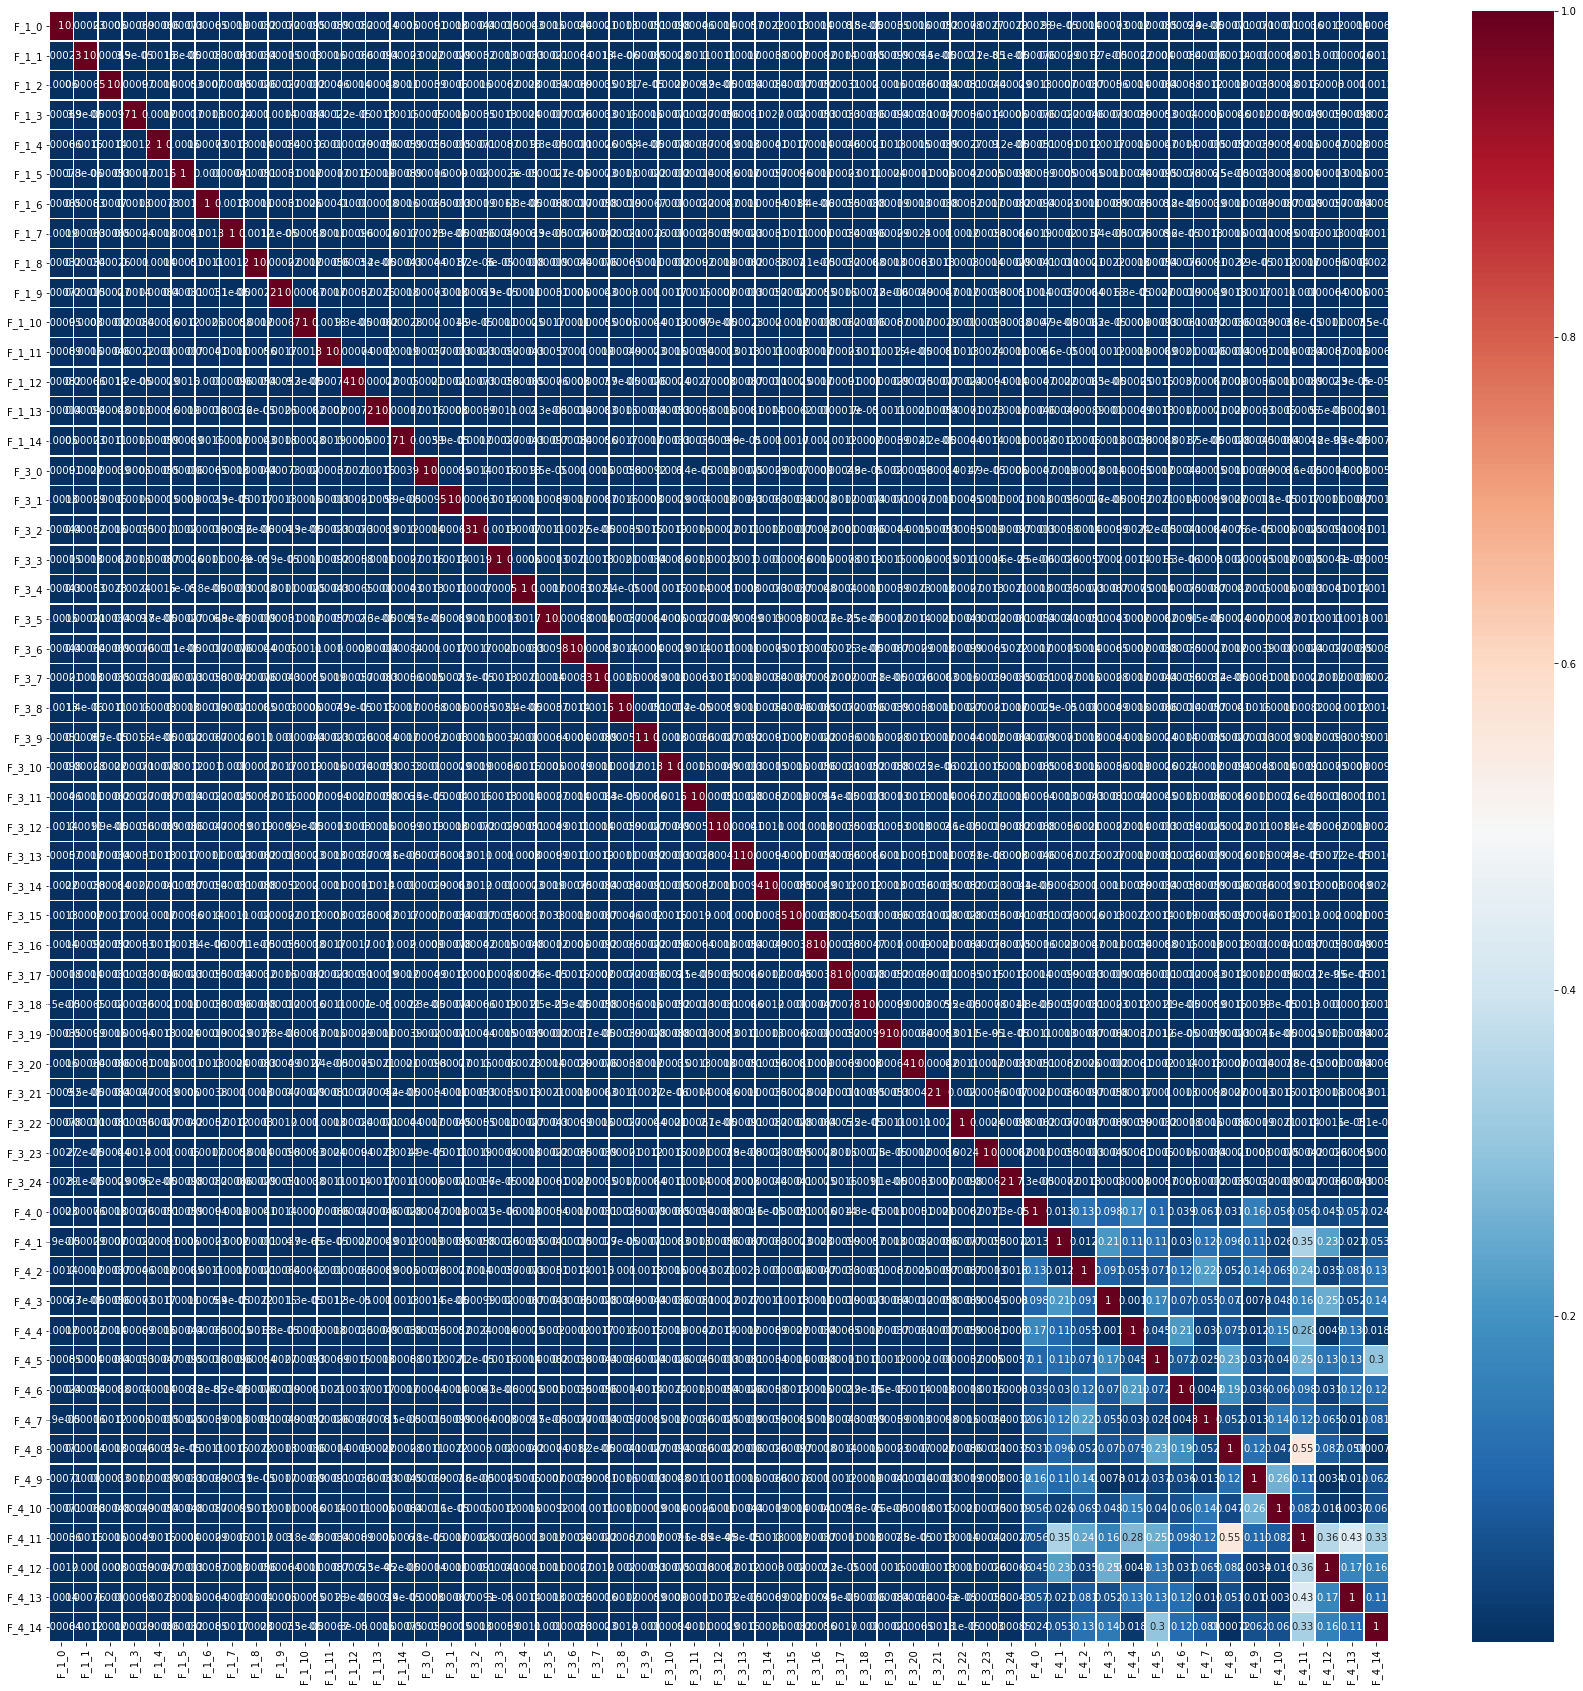

In [103]:
plt.figure(figsize=(30, 30))
sns.heatmap(np.abs(pearsoncorr), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

<AxesSubplot:>

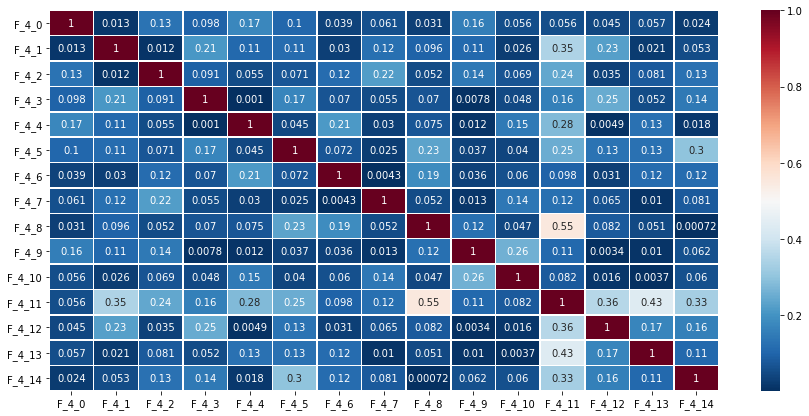

In [105]:
#zoom sur les corrélations entre les colonnes commençant par F_4 seulement 

pearsoncorr_4 = pearsoncorr.loc[[row for row in pearsoncorr.index if row.split('_')[1] == '4'],
                                [col for col in pearsoncorr.columns if (col.split('_')[1] == '4')]]

plt.figure(figsize=(15, 7))
sns.heatmap(np.abs(pearsoncorr_4), 
            xticklabels=pearsoncorr_4.columns,
            yticklabels=pearsoncorr_4.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [122]:
print(f"""Les colonnes comportant des nans ont en moyenne {round(data.loc[:, data.columns[~mask_int64]].isna().mean().mean()*100, 2)} % de nans
avec une moyenne minimale de {round(data.loc[:, data.columns[~mask_int64]].isna().mean().min()*100,2)} % de nans
et une moyenne maximale de {round(data.loc[:, data.columns[~mask_int64]].isna().mean().max()*100, 2)} % de nans""")

Les colonnes comportant des nans ont en moyenne 1.82 % de nans
avec une moyenne minimale de 1.8 % de nans
et une moyenne maximale de 1.85 % de nans
